# Домашнее задание к лекции «Задачи классификации и кластеризации»

Текст задания также доступен тут http://prntscr.com/umci7o

Задание.

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

Разделите данные на выборку для обучения и тестирования

Постройте модель LDA

Визуализируйте предсказания для тестовой выборки и центры классов

Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# загружаем датасет
iris = load_iris()

In [3]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
data_class = iris.target

In [4]:
# вставляем variety
data['variety'] = pd.DataFrame(data_class)
display(data)

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [5]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [6]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
y_predict = lda.predict(X_test)
y_predict

array([1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2])

In [8]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,2,2
2,0,0
3,1,1
4,2,2
5,0,0
6,2,2
7,0,0
8,0,0
9,0,0


In [9]:
from sklearn.metrics import accuracy_score

In [10]:
#точность
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

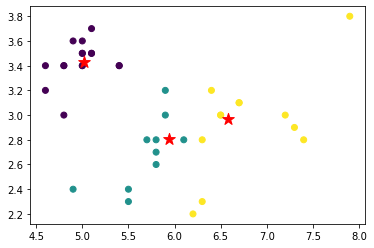

In [15]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_predict)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

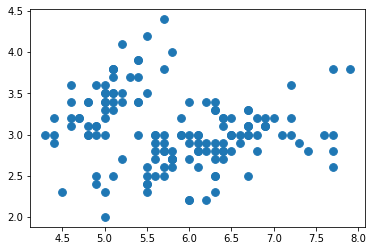

In [16]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='autumn', s=60)

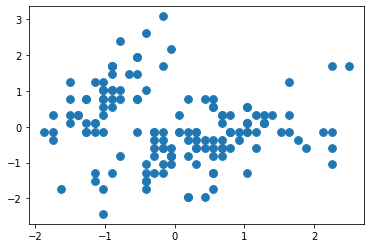

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [21]:
from sklearn.cluster import KMeans

# На визуализации видно 2 кластера, но в предыдущей визуализации мы видим 3 центра, поэтому оставим 3 кластера
kmeans = KMeans(n_clusters=3)

# Обучаем и присваиваем кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0])

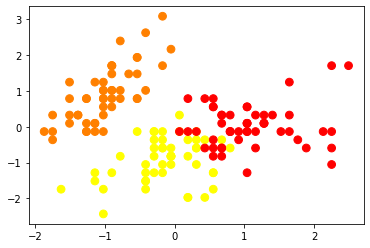

In [22]:
# Визуализируем кластеры
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)